In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import calendar
import datetime

In [2]:
data = pd.read_csv('UberDrives.csv')

In [3]:
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [6]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [9]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [59]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'])
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'])

C:\Users\user\AppData\Local\Temp\ipykernel_10268\3947452879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['START_DATE*'] = pd.to_datetime(data['START_DATE*'])
C:\Users\user\AppData\Local\Temp\ipykernel_10268\3947452879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['END_DATE*'] = pd.to_datetime(data['END_DATE*'])


In [11]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [12]:
# Now let's iterate over the data, extracting various time-related components from the 'START_DATE*' column, and then creating new columns in the same dataset to store these components. 

In [13]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
data['HOUR'] = hour
data['DAY'] = day
data['dayofweek'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday
    

C:\Users\user\AppData\Local\Temp\ipykernel_10268\3108607745.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HOUR'] = hour
C:\Users\user\AppData\Local\Temp\ipykernel_10268\3108607745.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAY'] = day
C:\Users\user\AppData\Local\Temp\ipykernel_10268\3108607745.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [14]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,dayofweek,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [15]:
#NOW THAT WE ARE DONE WITH THE START AND THE END DATE, LET'S MOVE TO THE CATEGORY OF THE TRIP. TO KNOW REASONS WHY PEOPLE BOOK UBER
# AND WE ARE ALSO GOING TO PLOT IT IN A GRAPH TO SEE THE DISPARITIES BETWEEN THESE CATEGORIES

In [16]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

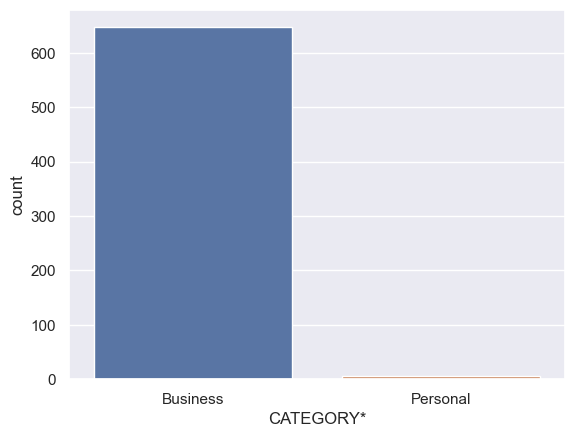

In [17]:
sns.countplot(x='CATEGORY*', data = data)

In [18]:
#FROM THE GRAPH CATEGORY, WE CAN SEE THAT PEOPLE BOOK UBER MOSTLY FOR BUSINESS PURPOSE.

In [19]:
#NOW LET'S FIND HOW LONG DO PEOPLE TRAVEL WITH UBER

<Axes: ylabel='Frequency'>

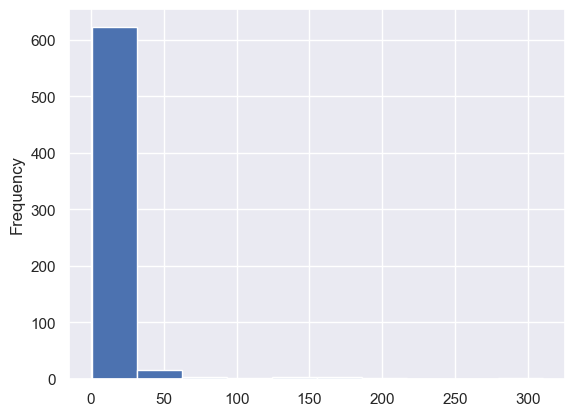

In [20]:
data['MILES*'].plot.hist()

In [21]:
#FROM THE GRAPH, WE CAN SEE THAT MOST PEOPLE BOOK UBER FROM 1 - 50 MILES. THIS IS TO SAY THAT PEOPLE BOOK UBER MORE FOR SHORTER 
#MILES THAN THEY DO FOR LONGER MILES.

In [22]:
#NOW LET'S CHECK WHAT HOURS DO MOST PEOPLE BOOK UBER THE MOST?

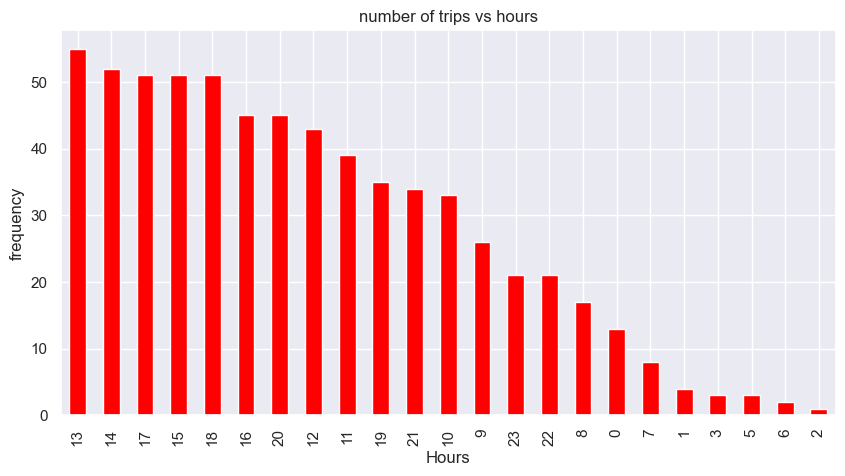

In [32]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar', color = 'red', figsize=(10, 5))


plt.xlabel('Hours')
plt.ylabel('frequency')
plt.title('number of trips vs hours')


plt.show()

In [ ]:
#This insights, from the bar charts show us the timr duration people book uber the most. this is insightful for companies that
#Want to know the time to target it customers for ads or discounts.

In [33]:
#PURPOSE OF TRIP


<Axes: >

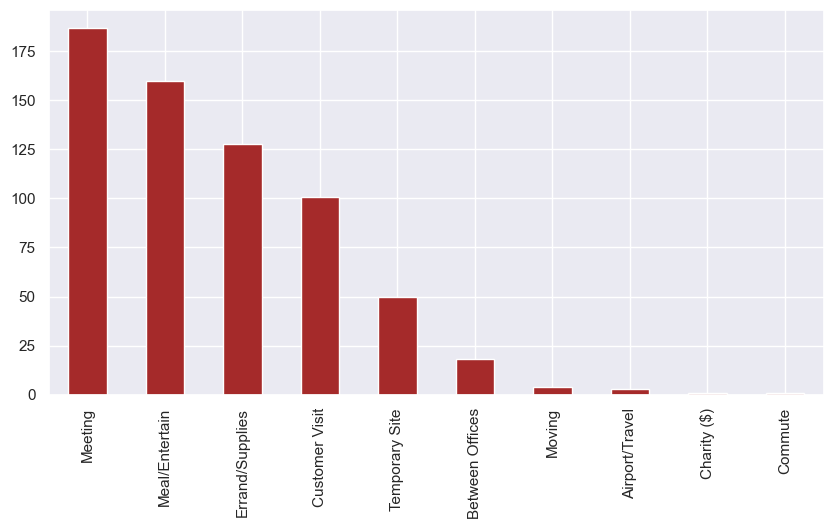

In [36]:
data['PURPOSE*'].value_counts().plot(color= 'brown', kind= 'bar', figsize=(10, 5))

In [ ]:
# we can see from the bar chart, That most people use uber for meeting purpose more than for commutes.So if uber wants to target people
#They should target those who book uber for meeting, meal/Entertainment, errand/supplies. This insight will help to make business
#Decison.

<Axes: >

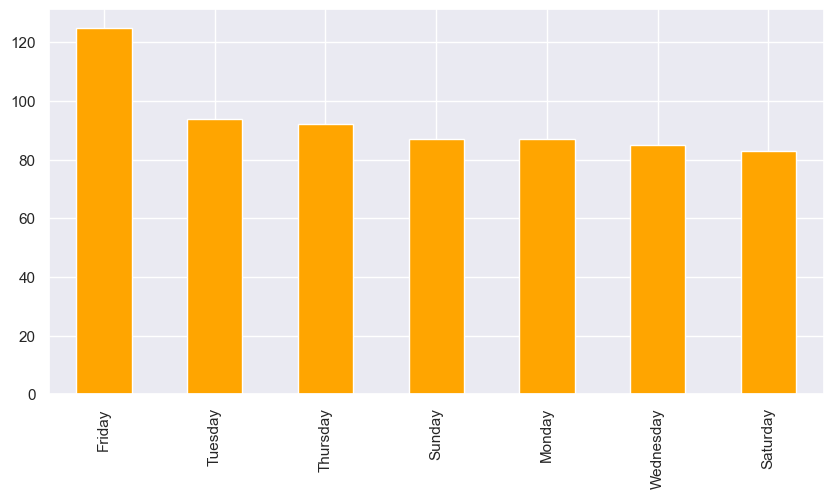

In [37]:
data['WEEKDAY'].value_counts().plot(color= 'orange', kind= 'bar', figsize=(10, 5))

In [38]:
# most people book uber on friday.

In [39]:
#WHAT ARE THE NUMBER OF TRIPS PER EACH DAY?

<Axes: >

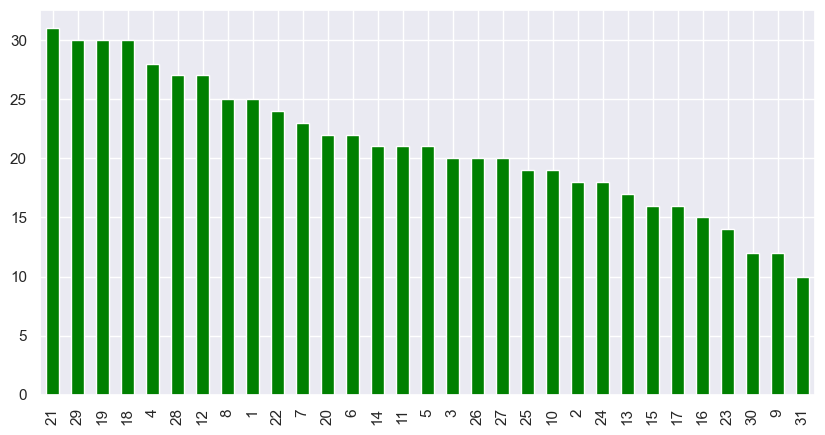

In [43]:
data['DAY'].value_counts().plot(color= 'green', kind= 'bar', figsize=(10, 5))

In [44]:
#From this charts, we can see that most persons book uber on the 21st day of the  month, 29,29. the least booked was on the 31st

In [45]:
#WHAT ARE THE TRIPS IN THE MONTHS?


<Axes: >

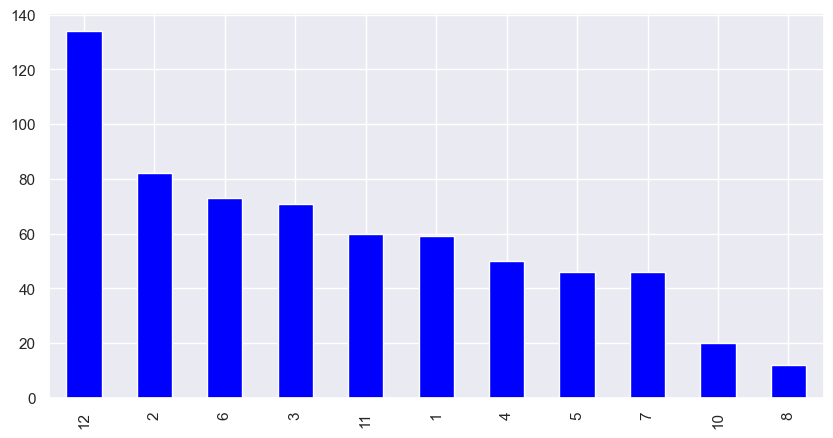

In [47]:
data['MONTH'].value_counts().plot(color= 'blue', kind= 'bar', figsize=(10, 5))

In [50]:
#From the charts, we can tell that the revenue of bolt is goin to rise in the 12th Month of the year... This is to say that more people book
#Bolt in the 12th month. and in the 8 months of the year being september. they will be no much profit.

In [51]:
#Now let's look at where people bookuber the most.

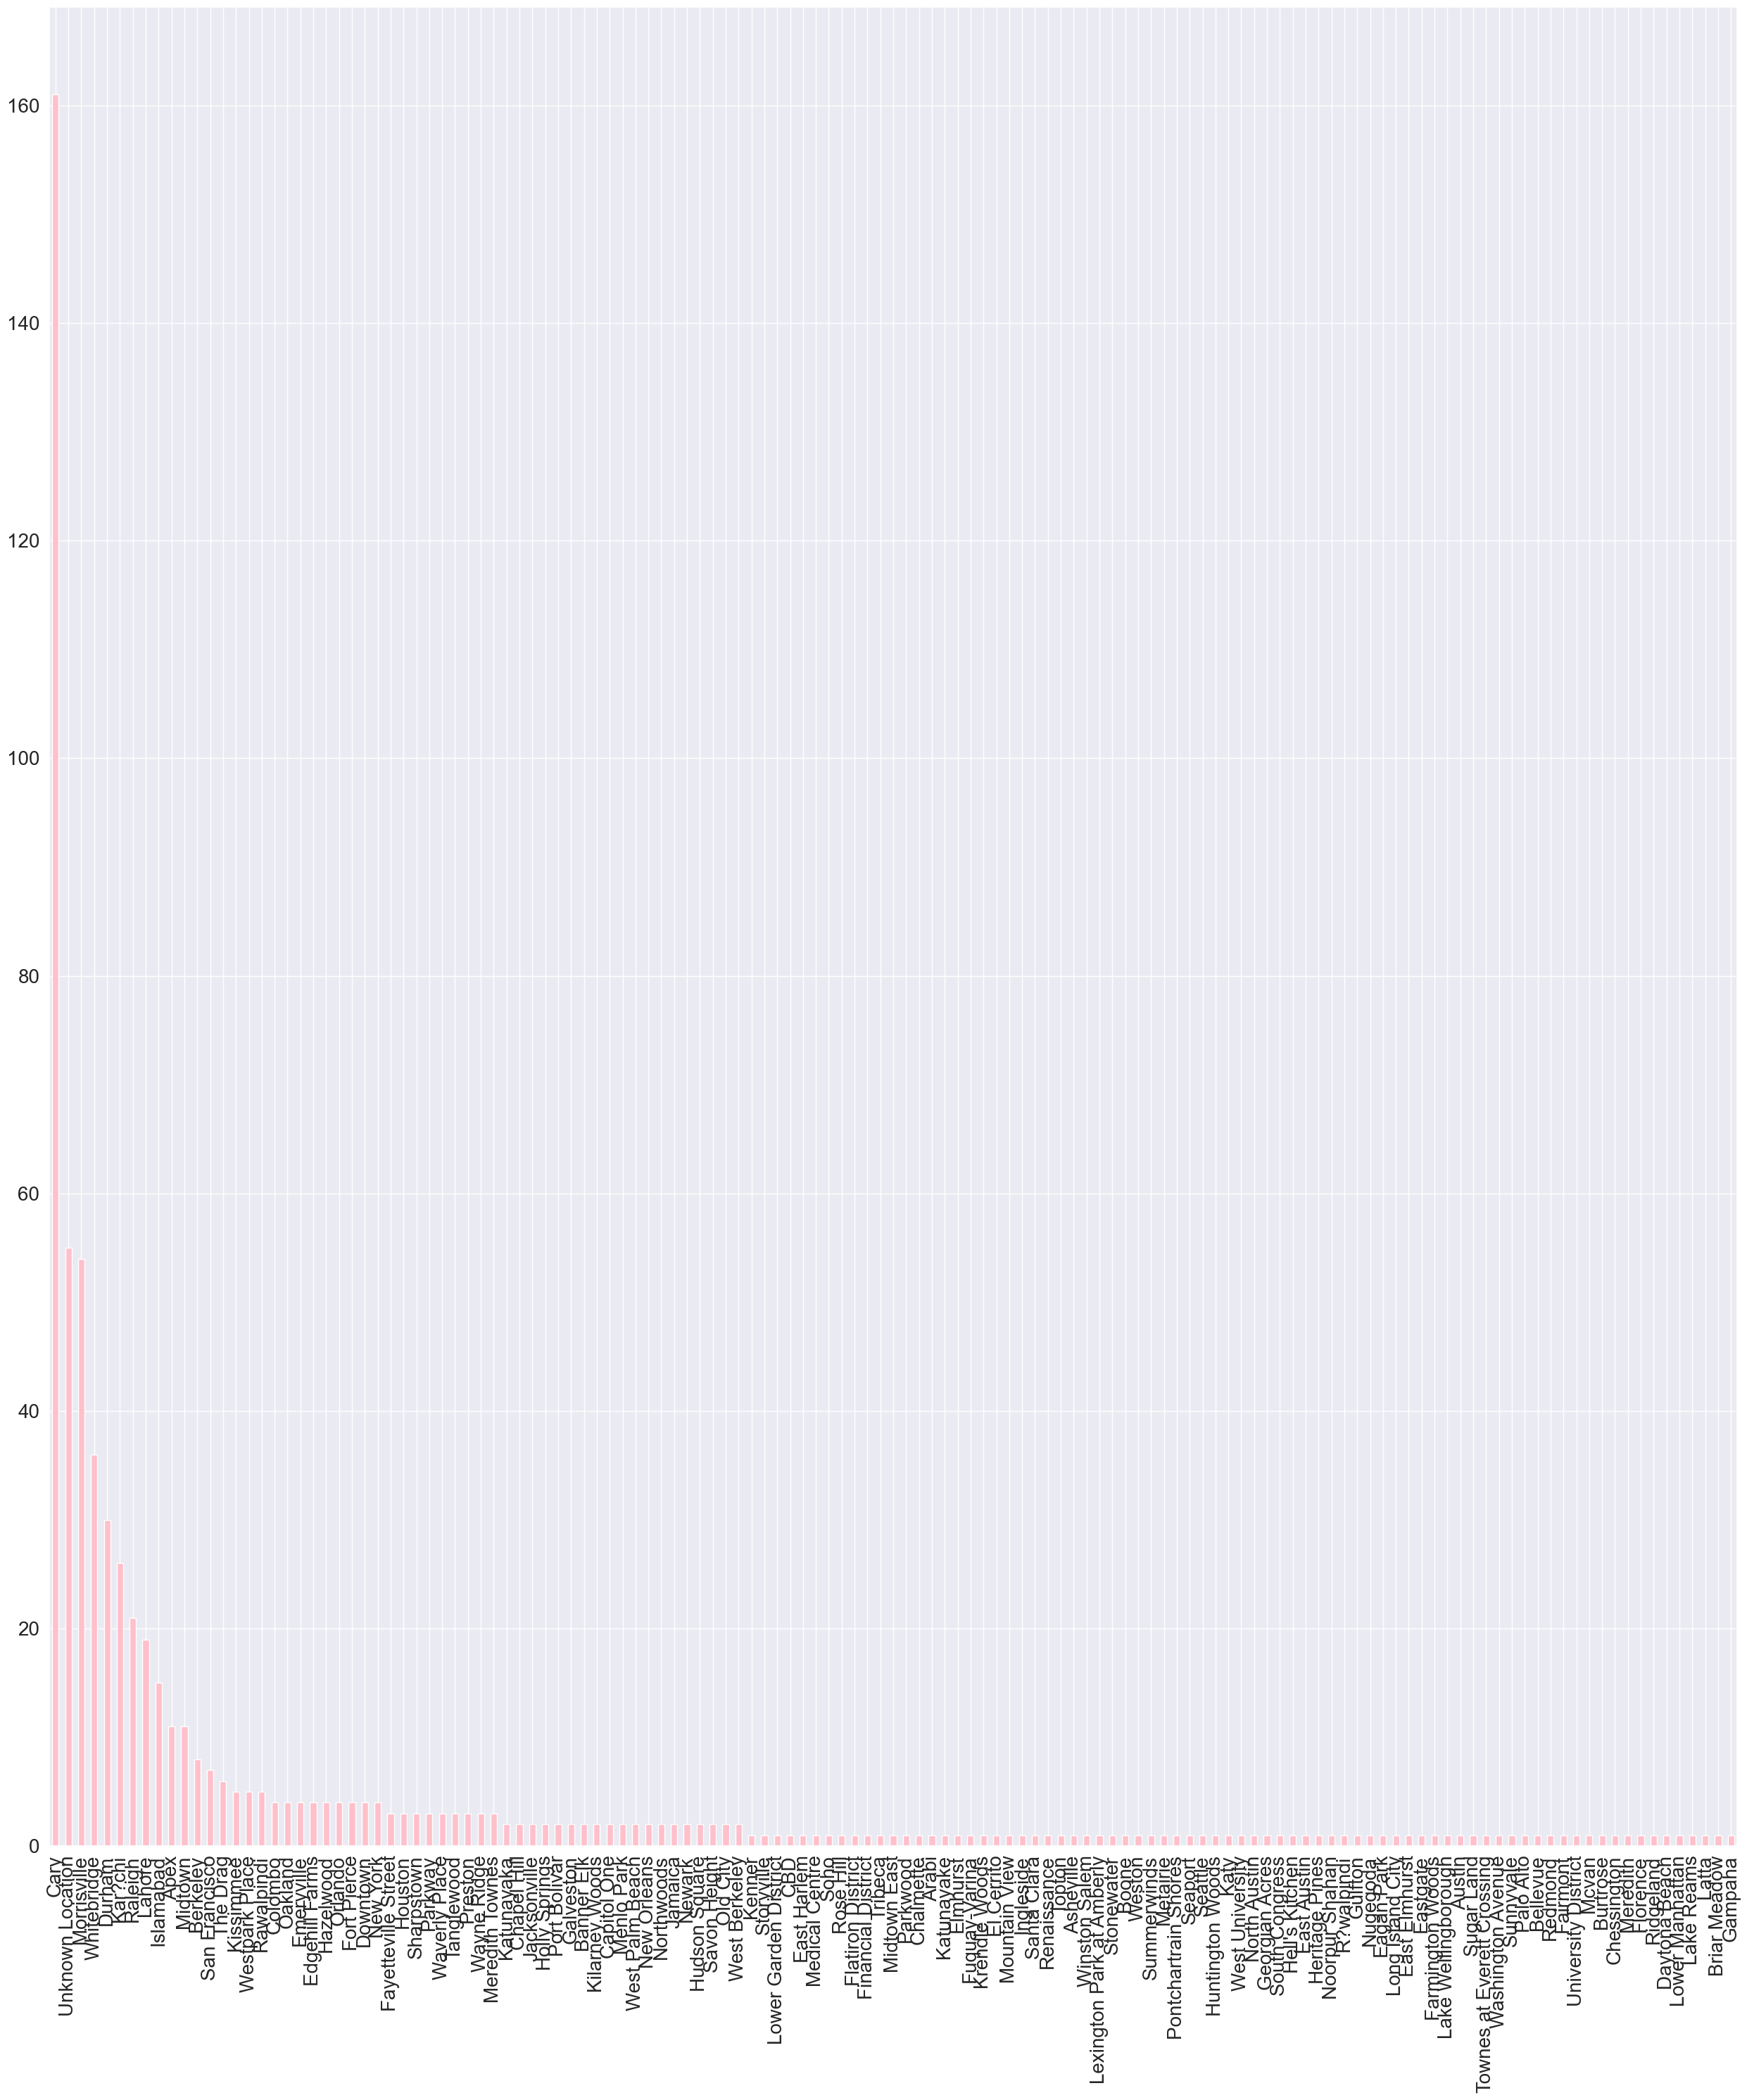

In [58]:
data['START*'].value_counts().plot(color='pink', kind='bar', figsize=(25, 30), fontsize= 20)
plt.tight_layout()

In [ ]:
#from our graph, we can see that Cary is the location where most persons booked their boltfrom  the most. This insights will help uber knows
#the location to focus on.

In [60]:
#NOW LETS CHECK FOR STOP

In [64]:
data['STOP*'].value_counts().plots(kind = 'bar', color='yellow', figsize =(25, 15))

AttributeError: 'Series' object has no attribute 'plots'